In [1]:
cd ../../..

/Users/opop/Desktop/QuickDraw-ML


In [2]:
from schema.training.feclassifier import TransformersFEClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
DATA_DIR = 'data/img'

In [4]:
with open(f'data/labels.txt') as f:
    labels = f.read().splitlines()

label2idx = {label: idx for idx, label in enumerate(labels)}

In [5]:
print(label2idx)

{'airplane': 0, 'banana': 1, 'computer': 2, 'dog': 3, 'elephant': 4, 'fish': 5, 'garden': 6, 'helmet': 7, 'ice cream': 8, 'jail': 9, 'key': 10, 'lantern': 11, 'motorbike': 12, 'necklace': 13, 'onion': 14, 'penguin': 15, 'raccoon': 16, 'sandwich': 17, 'table': 18, 'underwear': 19, 'vase': 20, 'watermelon': 21, 'yoga': 22, 'zigzag': 23}


In [6]:
classifier = TransformersFEClassifier(
              embedding_model_name="google/vit-base-patch16-224",
              classifier_model=GaussianNB(),
              output_dir='.',
              data_path=DATA_DIR,
              label2idx=label2idx,
              device='cpu',
              seed=42)

/opt/anaconda3/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading images from train:   0%|          | 0/24 [00:00<?, ?it/s]

Loading images from val:   0%|          | 0/24 [00:00<?, ?it/s]

Loading images from test:   0%|          | 0/24 [00:00<?, ?it/s]

In [7]:
print(classifier.data)

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 3315
    })
    val: Dataset({
        features: ['image', 'labels'],
        num_rows: 1097
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 1100
    })
})


Training model
No embeddings found, computing them


Map:   0%|          | 0/3315 [00:00<?, ? examples/s]

Map:   0%|          | 0/1097 [00:00<?, ? examples/s]

Map:   0%|          | 0/1100 [00:00<?, ? examples/s]

Using MLflow experiment: Feature_Extraction
[Errno 45] Operation not supported: '/home/v8'


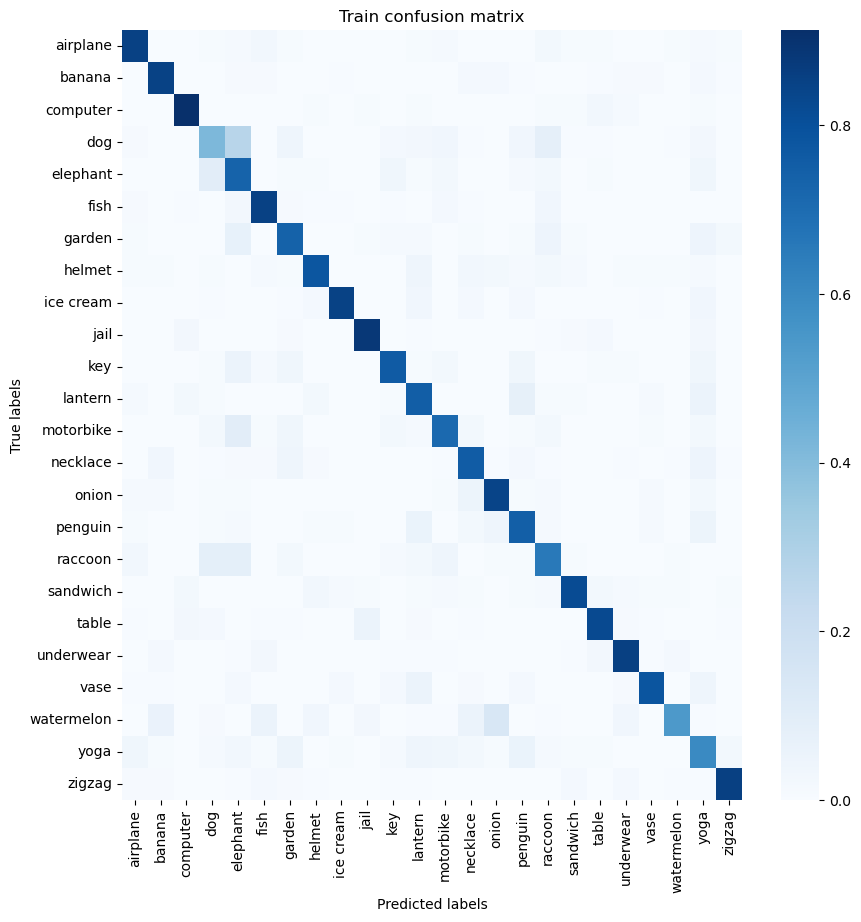

In [8]:
classifier.train()